# Detectors, Generators, Models

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../src')

In [2]:
import pandas as pd
import numpy as np
import ontime as on

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/statsforecast/core.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


---
## Generation of random time series

In [3]:
ts = on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31'))

In [4]:
ts[0:5]

<TimeSeries (DataArray) (time: 5, component: 1, sample: 1)>
array([[[2.38011347]],

       [[2.42314055]],

       [[1.85588429]],

       [[1.6778977 ]],

       [[1.87561914]]])
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 2022-01-02 ... 2022-01-05
  * component  (component) object 'random_walk'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

---

## Detectors

### Threshold

In [5]:
td = on.detectors.threshold(low_threshold=-2)

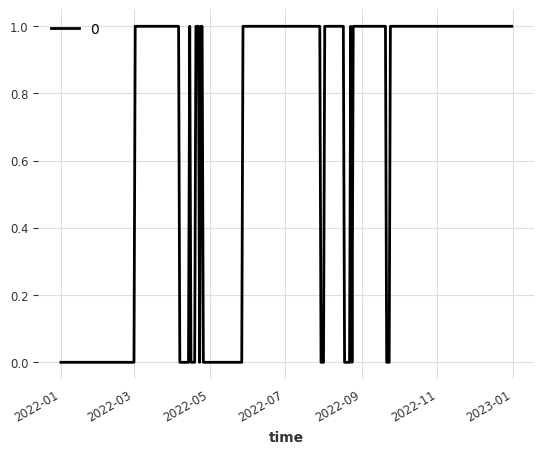

In [6]:
td.detect(ts).plot();

### Quantile

In [7]:
td = on.detectors.quantile(low_quantile=0.1)

In [8]:
td.fit(ts)

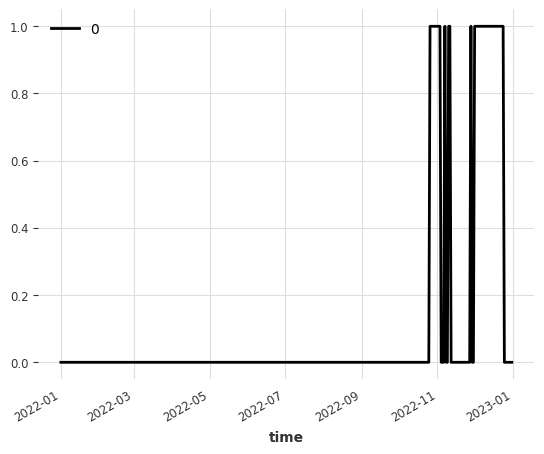

In [9]:
td.detect(ts).plot();

---
## Generators

### Constant

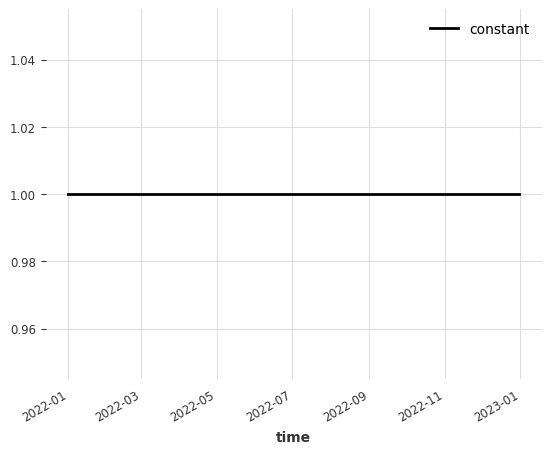

In [10]:
on.generators.constant().generate(1, pd.Timestamp('2022-01-01'), pd.Timestamp('2022-12-31')).plot();

### Gaussian Noise

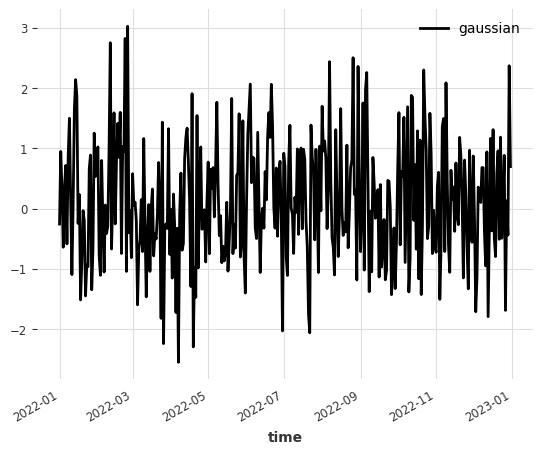

In [11]:
on.generators.gaussian().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31')).plot();

### Random Walk

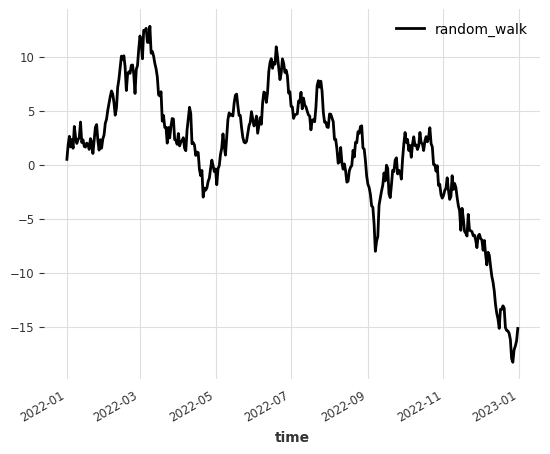

In [12]:
on.generators.random_walk().generate(start=pd.Timestamp('2022-01-01'), end=pd.Timestamp('2022-12-31')).plot();

---
## Models

### Arima

In [13]:
m = on.models.arima()

In [14]:
m.fit(ts)

ARIMA(p=12, d=1, q=0, seasonal_order=(0, 0, 0, 0), trend=None, random_state=None, add_encoders=None)

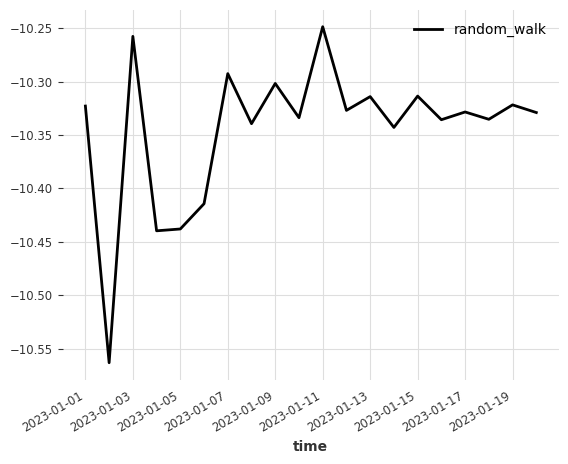

In [15]:
m.predict(20).plot();

### Catboost

In [16]:
m = on.models.catboost(5)

In [17]:
m.fit(ts)

CatBoost(lags=5, lags_past_covariates=None, lags_future_covariates=None, output_chunk_length=1, add_encoders=None, likelihood=None, quantiles=None, random_state=None, multi_models=True, use_static_covariates=True)

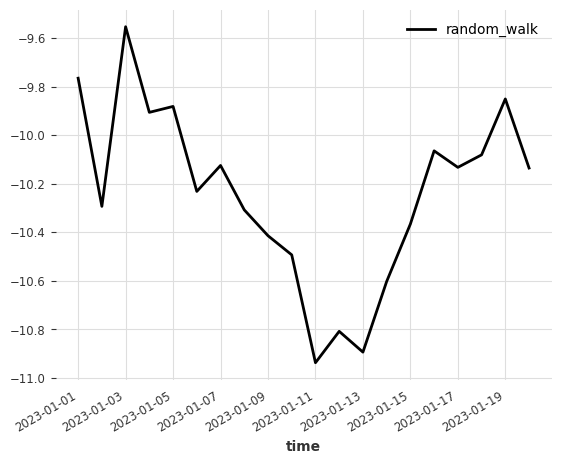

In [18]:
m.predict(20).plot();

### Temporal Convolutional Network

In [19]:
m = on.models.TCN(10, 5)

In [20]:
ts = ts.astype(np.float32)

In [21]:
m.fit(ts)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type              | Params
----------------------------------------------------
0 | criterion     | MSELoss           | 0     
1 | train_metrics | MetricCollection  | 0     
2 | val_metrics   | MetricCollection  | 0     
3 | dropout       | MonteCarloDropout | 0     
4 | res_blocks    | ModuleList        | 92    
----------------------------------------------------
92        Trainable params
0         Non-trainable params
92        Total params
0.000     Total estimated model params size (MB)


Epoch 99: 100%|█████████████████████████████| 11/11 [00:00<00:00, 112.68it/s, train_loss=4.780]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|█████████████████████████████| 11/11 [00:00<00:00, 111.85it/s, train_loss=4.780]


TCN(input_chunk_length=10, output_chunk_length=5, kernel_size=3, num_filters=3, num_layers=None, dilation_base=2, weight_norm=False, dropout=0.2)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|███████████████████████████████████| 1/1 [00:00<00:00, 24.22it/s]


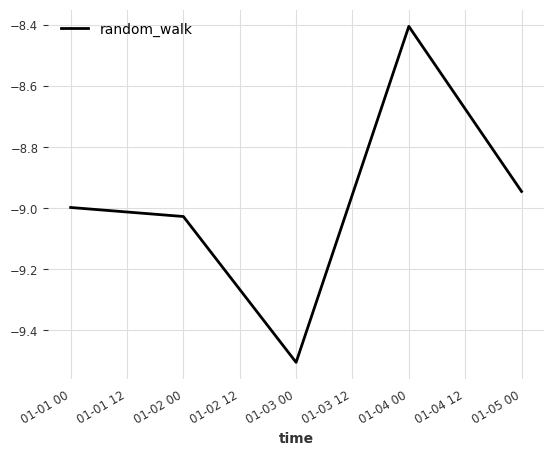

In [22]:
m.predict(5).plot();